# Predicció del moviment del preu del Bitcoin

Amb les variables que hem seleccionat a partir de l'estudi de correlacions farem el nostre model, que consistirà en predir si el preu de Bitcoin pujarà o baixarà al dia següent.

#### Bitcoin data

In [1]:
# Importem yfinance, que és una llibreria que conecta amb la API de Yahoo Finance
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Obtenim l'historial diari del preu del Bitcoin
btc = yf.Ticker("BTC-USD").history(period="max")
btc['Date'] = btc.index.date
btc.set_index('Date', inplace=True)
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-16,30297.472656,30437.560547,30089.669922,30249.132812,8516564470,0.0,0.0
2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,13240156074,0.0,0.0
2023-07-18,30147.070312,30233.656250,29556.427734,29856.562500,13138897269,0.0,0.0


In [2]:
# Eliminem totes les columnes menys "Close", que és el preu al que va tancar el dia
btc.drop(["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"], axis=1, inplace=True)

# Fem rename a "Close"
btc.rename(columns = {'Close': 'Bitcoin Price'}, inplace=True)
btc

,Bitcoin Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2023-07-16,30249.132812
2023-07-17,30145.888672
2023-07-18,29856.562500


In [3]:
# Omplim els dies que falten amb el valor anterior

# Creem un nou dataframe amb totes les dates
date_range_btc = pd.date_range(start=btc.index.min(), end=btc.index.max(), freq='D')
df_filled_btc = pd.DataFrame(index=date_range_btc)

# Unim el dataframe original amb el nou utilitzant left join
btc = df_filled_btc.join(btc)

# Omplim els valors faltants amb el valor anterior
btc.fillna(method='ffill', inplace=True)

# Convertim la columna "Bitcoin Price" en int
btc['Bitcoin Price'] = btc['Bitcoin Price'].round().astype(int)
btc

,Bitcoin Price
2014-09-17,457
2014-09-18,424
2014-09-19,395
2014-09-20,409
2014-09-21,399
...,...
2023-07-17,30146
2023-07-18,29857
2023-07-19,29914
2023-07-20,29914


#### Nasdaq data

In [4]:
# Obtenim les dades del NASDAQ
nasdaq = yf.Ticker("^IXIC").history(period="max")
nasdaq['Date'] = nasdaq.index.date
nasdaq.set_index('Date', inplace=True)
nasdaq

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,0,0.0,0.0
1971-02-08,100.839996,100.839996,100.839996,100.839996,0,0.0,0.0
1971-02-09,100.760002,100.760002,100.760002,100.760002,0,0.0,0.0
1971-02-10,100.690002,100.690002,100.690002,100.690002,0,0.0,0.0
1971-02-11,101.449997,101.449997,101.449997,101.449997,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-17,14149.919922,14274.410156,14138.009766,14244.950195,4593160000,0.0,0.0
2023-07-18,14212.250000,14396.690430,14176.110352,14353.639648,4824070000,0.0,0.0
2023-07-19,14398.530273,14446.549805,14317.089844,14358.019531,5112420000,0.0,0.0


In [5]:
# Convertim la columna "Close" en int
nasdaq['Close'] = nasdaq['Close'].round().astype(int)

# Eliminem totes les columnes menys "Close", que és el preu al que va tancar el dia
nasdaq.drop(["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"], axis=1, inplace=True)

# Fem rename a "Close"
nasdaq.rename(columns = {'Close': 'Nasdaq Price'}, inplace=True)
nasdaq

,Nasdaq Price
Date,
1971-02-05,100
1971-02-08,101
1971-02-09,101
1971-02-10,101
1971-02-11,101
...,...
2023-07-17,14245
2023-07-18,14354
2023-07-19,14358


In [6]:
# Omplim els dies que falten (ja que només hi ha valors de dilluns a divendres) amb el valor anterior

# Creem un nou dataframe amb totes les dates
date_range = pd.date_range(start=nasdaq.index.min(), end=nasdaq.index.max(), freq='D')
df_filled = pd.DataFrame(index=date_range)

# Unim el dataframe original amb el nou utilitzant left join
nasdaq = df_filled.join(nasdaq)

# Omplim els valors faltants amb el valor anterior
nasdaq.fillna(method='ffill', inplace=True)
nasdaq = nasdaq.round().astype(int)
nasdaq = nasdaq.rename_axis("Date")
nasdaq

,Nasdaq Price
Date,
1971-02-05,100
1971-02-06,100
1971-02-07,100
1971-02-08,101
1971-02-09,101
...,...
2023-07-17,14245
2023-07-18,14354
2023-07-19,14358


#### Fear & Greed Index

In [7]:
# Importem les dades del Fear and Greed Index mitjançant una API
import requests

r = requests.get('https://api.alternative.me/fng/?limit=0')
fg = pd.DataFrame(r.json()['data'])
fg

,value,value_classification,timestamp,time_until_update
0,50,Neutral,1689897600,10387
1,56,Greed,1689811200,NaN
2,50,Neutral,1689724800,NaN
3,56,Greed,1689638400,NaN
4,54,Neutral,1689552000,NaN
...,...,...,...,...
1989,11,Extreme Fear,1517788800,NaN
1990,24,Extreme Fear,1517702400,NaN
1991,40,Fear,1517616000,NaN
1992,15,Extreme Fear,1517529600,NaN


In [8]:
# Ens quedem unicament amb la columna "value"
fg.drop(["value_classification", "time_until_update"], axis=1, inplace=True)

# Posem el format horari igual que en els anteriors dataframes
fg.timestamp = pd.to_datetime(fg.timestamp, unit='s')

# Canviem el nom a la columna "timestamp" per "Date" i "value" per "F&G Index"
fg.rename(columns = {'timestamp': 'Date', 'value': 'F&G Index'}, inplace=True)

# Convertim la columna 'Date' en l'índex
fg.set_index('Date', inplace=True)
fg

,F&G Index
Date,
2023-07-21,50
2023-07-20,56
2023-07-19,50
2023-07-18,56
2023-07-17,54
...,...
2018-02-05,11
2018-02-04,24
2018-02-03,40


In [9]:
# Fusionem els 3 dataframes
df = btc.merge(nasdaq, left_index=True, right_index=True)
df = df.merge(fg, left_index=True, right_index=True)
df.index = pd.to_datetime(df.index)
df

,Bitcoin Price,Nasdaq Price,F&G Index
2018-02-01,9171,7386,30
2018-02-02,8831,7241,15
2018-02-03,9175,7241,40
2018-02-04,8277,7241,24
2018-02-05,6955,6968,11
...,...,...,...
2023-07-17,30146,14245,54
2023-07-18,29857,14354,56
2023-07-19,29914,14358,50
2023-07-20,29914,14063,56


In [10]:
# El nostre model es basa en predir si al dia següent el preu pujarà o baixarà
# Creem una columna que es diu "Tomorrow" que conté el preu del dia anterior, ens ajudarà a crear la columna "Target"
df['Tomorrow'] = df['Bitcoin Price'].shift(-1)
df['Tomorrow'].fillna(0, inplace=True)
df['Tomorrow'] = df['Tomorrow'].round().astype(int)
df

,Bitcoin Price,Nasdaq Price,F&G Index,Tomorrow
2018-02-01,9171,7386,30,8831
2018-02-02,8831,7241,15,9175
2018-02-03,9175,7241,40,8277
2018-02-04,8277,7241,24,6955
2018-02-05,6955,6968,11,7754
...,...,...,...,...
2023-07-17,30146,14245,54,29857
2023-07-18,29857,14354,56,29914
2023-07-19,29914,14358,50,29914
2023-07-20,29914,14063,56,29891


In [11]:
# Creem la columna "Target", que conté un boolean transformat a int que indica si el preu puja o no
df["Target"] = (df['Tomorrow'] > df['Bitcoin Price']).astype(int)

df

,Bitcoin Price,Nasdaq Price,F&G Index,Tomorrow,Target
2018-02-01,9171,7386,30,8831,0
2018-02-02,8831,7241,15,9175,1
2018-02-03,9175,7241,40,8277,0
2018-02-04,8277,7241,24,6955,0
2018-02-05,6955,6968,11,7754,1
...,...,...,...,...,...
2023-07-17,30146,14245,54,29857,0
2023-07-18,29857,14354,56,29914,1
2023-07-19,29914,14358,50,29914,0
2023-07-20,29914,14063,56,29891,0


In [12]:
# Comprovem els nulls
df.isna().sum().sum()

0

#### Train/Test

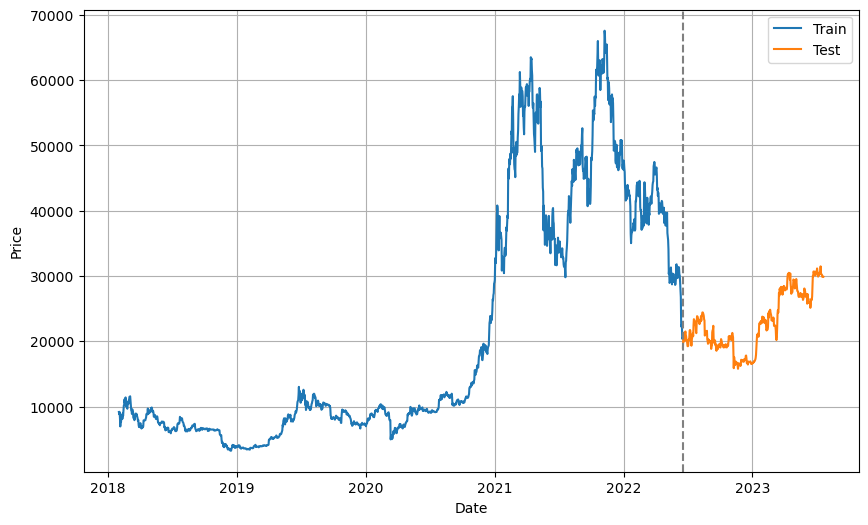

In [13]:
import matplotlib.pyplot as plt

# Farem un Train/Test de 80/20
fila = int(len(df) * 0.8)
train = df[:fila]
test = df[fila:]

# Ho representem gràficament
plt.figure(figsize= (10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df[0:fila]['Bitcoin Price'], label='Train')
plt.plot(df[fila:]['Bitcoin Price'], label='Test')

# Marquem el final de les dades d'entrenament i l'inici de les dades de prova amb una linia vertical
plt.axvline(x=df.index[fila], color='gray', linestyle='--')
plt.legend()
plt.show()

#### RandomForest, Support Vector Machine i Long Short-Term Memory

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf


np.random.seed(42)
tf.random.set_seed(42)

# Preprocessat dels diferents models (a RandomForest no li cal preprocessat)
preprocessing_steps_svc = [
    ('scaling', MinMaxScaler()), # Escalat de característiques
    ('feature_selection', SelectKBest()) # Selecció de les millors features
]

preprocessing_steps_lstm = [
    ('scaling', MinMaxScaler()) # Escalat de característiques
]

predictors = ["Bitcoin Price", "Nasdaq Price", "F&G Index"] # Llista de features

# Funció del model LSTM
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(units=100, input_shape=input_shape, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Funció per calcular l'scoring del model LSTM
def lstm_accuracy_score(model, X, y_true):
    y_pred = np.round(model.predict(X))
    return accuracy_score(y_true, y_pred)

# Definim els models
models = [
    ('RandomForest', RandomForestClassifier()),
    ('SVC', SVC()),
    ('LSTM', create_lstm_model) # Crida la funció del model LSTM
]

# LLista de pipelines per a cada model
pipelines = []

# Pipeline de RandomForest
pipelines.append(Pipeline(steps=[('RandomForest', RandomForestClassifier())]))

# Pipeline de SVC amb FeatureUnion per a la selecció de característiques i escalat
pipelines.append(Pipeline(steps=[('preprocess', FeatureUnion([
    ('scaling', MinMaxScaler()),
    ('feature_selection', SelectKBest())
])), ('SVC', SVC())]))

# Pipeline de LSTM amb escalat
pipelines.append(Pipeline(steps=[('preprocess', preprocessing_steps_lstm), 
                                  ('LSTM', create_lstm_model(input_shape=(10, 3)))
                                 ]))


# Evaluem cada model utilitzant TimeSeriesSplit pel backtesting
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
    
for pipeline in pipelines:
    model_name = pipeline.steps[-1][0]

    if model_name == 'LSTM':
        tf.get_logger().setLevel("ERROR")
        num_samples = (fila // 10) * 10

        X_train_lstm = train[predictors][:num_samples].values.reshape(-1, 10, 3)
        y_train_lstm = train["Target"][:num_samples].values

        scores = []
        for train_index, test_index in tscv.split(X_train_lstm):
            X_train_lstm_fold, X_val_lstm_fold = X_train_lstm[train_index], X_train_lstm[test_index]
            y_train_lstm_fold, y_val_lstm_fold = y_train_lstm[train_index], y_train_lstm[test_index]

            X_train_lstm_fold = X_train_lstm_fold.astype('float32')
            y_train_lstm_fold = y_train_lstm_fold.astype('float32')
            X_val_lstm_fold = X_val_lstm_fold.astype('float32')
            y_val_lstm_fold = y_val_lstm_fold.astype('float32')

            model = create_lstm_model(input_shape=(10, 3))
            model.fit(X_train_lstm_fold, y_train_lstm_fold, epochs=10, batch_size=32, verbose=0)
            score = lstm_accuracy_score(model, X_val_lstm_fold, y_val_lstm_fold)
            scores.append(score)

        scores = np.array(scores)

    else:
        scores = cross_val_score(pipeline.named_steps[model_name], train[predictors], train["Target"], cv=tscv)

    print(f"{model_name} - Precisió mitjana: {np.mean(scores):.3f}")

RandomForest - Precisió mitjana: 0.502
SVC - Precisió mitjana: 0.496
1/1 [==============================] - 0s 110ms/step
LSTM - Precisió mitjana: 0.538


Tots els models ens donen una precisió dels voltants del 50%. Tenint en compte que la variable que hem de predir és una variable binaria, aquests models no ens aportarien cap avantatge davant dels altres inversors, ja que obtindriem el mateix resultat invertint a l'atzar.

Com que "Bitcoin Price" i "Nasdaq Price" estàn altament correlacionats, aplicarem PCA per reduïr la multicolinealitat.

In [15]:
from sklearn.decomposition import PCA

# Preprocessat dels diferents models (a RandomForest no li cal preprocessat)
preprocessing_steps_svc = [
    ('scaling', MinMaxScaler()), # Escalat de característiques
    ('feature_selection', SelectKBest()) # Selecció de les millors features
]

preprocessing_steps_lstm = [
    ('scaling', MinMaxScaler()) # Escalat de característiques
]

predictors = ["Bitcoin Price", "Nasdaq Price", "F&G Index"] # Llista de features

# Funció del model LSTM
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(units=100, input_shape=input_shape, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Funció per calcular l'scoring del model LSTM
def lstm_accuracy_score(model, X, y_true):
    y_pred = np.round(model.predict(X))
    return accuracy_score(y_true, y_pred)

# Funció per aplicar PCA a les variables "Bitcoin Price" i "Nasdaq Price"
def apply_pca(X):
    pca = PCA(n_components=1)
    combined_price_pca = pca.fit_transform(X[["Bitcoin Price", "Nasdaq Price"]])
    X["Combined_Price_PCA"] = combined_price_pca
    return X

# Definim els models
models = [
    ('RandomForest_pca', RandomForestClassifier()),
    ('SVC_pca', SVC()),
    ('LSTM_pca', create_lstm_model) # Crida la funció del model LSTM
]

# LLista de pipelines per a cada model amb PCA
pipelines_with_pca = []

# Pipeline de RandomForest amb PCA
pipelines_with_pca.append(Pipeline(steps=[('RandomForest_pca', RandomForestClassifier())]))

# Pipeline de SVC amb FeatureUnion per a la selecció de característiques i escalat
pipelines_with_pca.append(Pipeline(steps=[('preprocess', FeatureUnion([
    ('scaling', MinMaxScaler()),
    ('feature_selection', SelectKBest())
])), ('SVC_pca', SVC())]))

# Pipeline de LSTM amb escalat i PCA
pipelines_with_pca.append(Pipeline(steps=[('preprocess', preprocessing_steps_lstm), 
                                          ('PCA', PCA(n_components=1)),
                                          ('LSTM_pca', create_lstm_model(input_shape=(10, 1)))
                                         ]))


# Evaluem cada model utilitzant TimeSeriesSplit pel backtesting
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

for pipeline in pipelines_with_pca:
    model_name = pipeline.steps[-1][0]

    if model_name == 'LSTM_pca':
        tf.get_logger().setLevel("ERROR")

        X_train_with_pca = apply_pca(train.copy())
        X_train_lstm = X_train_with_pca[predictors + ["Combined_Price_PCA"]].values.reshape(-1, 10, 1)
        y_train_lstm = X_train_with_pca["Target"].values

        scores = []
        for train_index, test_index in tscv.split(X_train_lstm):
            X_train_lstm_fold, X_val_lstm_fold = X_train_lstm[train_index], X_train_lstm[test_index]
            y_train_lstm_fold, y_val_lstm_fold = y_train_lstm[train_index], y_train_lstm[test_index]

            X_train_lstm_fold = X_train_lstm_fold.astype('float32')
            y_train_lstm_fold = y_train_lstm_fold.astype('float32')
            X_val_lstm_fold = X_val_lstm_fold.astype('float32')
            y_val_lstm_fold = y_val_lstm_fold.astype('float32')

            model = create_lstm_model(input_shape=(10, 1))
            model.fit(X_train_lstm_fold, y_train_lstm_fold, epochs=10, batch_size=32, verbose=0)
            score = lstm_accuracy_score(model, X_val_lstm_fold, y_val_lstm_fold)
            scores.append(score)

        scores = np.array(scores)

    else:
        X_train_with_pca = apply_pca(train.copy())
        y_train = X_train_with_pca["Target"]

        scores = cross_val_score(pipeline.named_steps[model_name], X_train_with_pca[predictors + ["Combined_Price_PCA"]], y_train, cv=tscv)

    print(f"{model_name} - Precisió mitjana amb PCA: {np.mean(scores):.3f}")


RandomForest_pca - Precisió mitjana amb PCA: 0.503
SVC_pca - Precisió mitjana amb PCA: 0.496
4/4 [==============================] - 0s 8ms/step
LSTM_pca - Precisió mitjana amb PCA: 0.498


Tot i aplicar PCA la precisió s'ha mantingut pràcticament idèntica.